In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [ ]:
* tenemos que seleccionar los k means
* la funcion busca minizar el cuadrado de las distancias de los clusteres

El algoritmo de clustering más usado es K-Means. Tiene una muy buena escalabilidad con la cantidad de datos. Para utilizar K-Means debemos especificar el número de grupos que queremos encontrar. A este número de grupos se le denomina K.

El algoritmo K-Means sigue los siguientes pasos:

* Inicialización: se elige la localización de los centroides de los K grupos aleatoriamente
* Asignación: se asigna cada dato al centroide más cercano
* Actualización: se actualiza la posición del centroide a la media aritmética de las posiciones de los datos asignados al grupo

Los pasos 2 y 3 se siguen iterativamente hasta que no haya más cambios.

https://www.iartificial.net/clustering-agrupamiento-kmeans-ejemplos-en-python/

In [2]:
data = np.random.random(90).reshape(30,3)

In [4]:
# tenemos que definir primero los centroides, de forma aleatoria, y depues el proceso es como vimos antes en la matriz de distancia (los datos se van modificando en funcion de la pertenencia a un cluster hasta que solo quede uno )
# primero seleccionamos dos datos de forma aleatoria
c1 = np.random.choice(range(len(data)))
c2 = np.random.choice(range(len(data)))
# ahora definimos los centros del cluster
clust_centers = np.vstack([data[c1],data[c2]])
clust_centers

array([[0.22224498, 0.19341254, 0.72137197],
       [0.47438007, 0.16825969, 0.543425  ]])

In [5]:
# ahora ya podemos implatar el modelo
from scipy.cluster.vq import vq

# con vq vemos la visualizacion de pertenencia
vq(data,clust_centers) # en el primer array nos dice a que cluster pertenece; el segundo nos dice la distancia de las observaciones del varicentro del cluster (ejemplo el primer dato seria el propio varicentro , el segundo esta a 0.8 del cluster 1...)

(array([1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 1]),
 array([0.        , 0.8321336 , 0.33026847, 0.33100481, 0.58989051,
        0.62106036, 0.4704975 , 0.19011345, 0.19591601, 0.70123869,
        0.85493799, 0.22858652, 0.85834592, 0.44826258, 0.42838259,
        0.50473729, 0.50155285, 0.        , 0.63277333, 0.61037472,
        0.41422578, 0.84899255, 0.74854854, 0.83295159, 0.32403949,
        0.4952241 , 0.26353579, 0.87090353, 0.45360534, 0.48273833]))

In [6]:
# con kmeans nos dice la informacion de los varicentros
from scipy.cluster.vq import kmeans
kmeans(data,clust_centers) # vemos los dos varicentros de los dos clusters; el numero final es la suma del cuadrado de los errores (0.377)

(array([[0.1703898 , 0.47660403, 0.61009228],
        [0.72334997, 0.49698484, 0.48696765]]), 0.3774596120343455)

In [7]:
# tambien podemos hacer lo mismo pero sin decirle la posicion de los centroides, ya que lo hace directamente; solo indicando el numero
kmeans(data,2)

(array([[0.42426699, 0.5386852 , 0.6422489 ],
        [0.82385177, 0.3952414 , 0.28721731]]), 0.37549556669983425)

### Ejercicio: segmentacion de los vinos

In [8]:
url = r"https://raw.githubusercontent.com/joanby/python-ml-course/master/datasets/wine/winequality-red.csv"
df = pd.read_csv(url,sep=";")
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

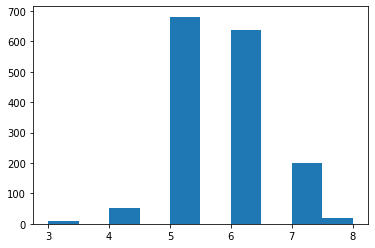

In [10]:
plt.hist(df["quality"])

In [11]:
# vemos  un resumen segun la calidad
# vemos por ejemplo que la volatildad tiene una corr negativa, asi como el cloro
# los sulfatos influyen positivamente, asi como los citricos
# dos que no pintan nada son la densidad y el azucar
df.groupby("quality").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [12]:
# primeros tenemos que normalizar los datos
df_norma = (df-df.min()) / (df.max()-df.min())
df_norma.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4


In [13]:
# clustering jerarquico
from sklearn.cluster import AgglomerativeClustering
# primero creamos los clusteres
clus = AgglomerativeClustering(n_clusters=6,linkage="ward").fit(df_norma)


Text(0, 0.5, 'frecuencia')

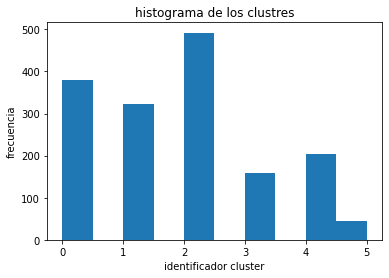

In [15]:
# creamos una serie con sus clusteres para representarlos
nd = pd.Series(clus.labels_)
plt.hist(nd)
plt.title("histograma de los clustres")
plt.xlabel("identificador cluster")
plt.ylabel("frecuencia")

In [16]:
# aqui podemos ver la estructura de los "hijos"
clus.children_

array([[   0,    4],
       [ 135,  140],
       [ 750,  751],
       ...,
       [3179, 3191],
       [3192, 3193],
       [3194, 3195]], dtype=int64)

In [18]:
# podemos pintar un dendograma
from scipy.cluster.hierarchy import dendrogram,linkage
Z = linkage(df_norma,"ward")

Text(0, 0.5, 'distancia')

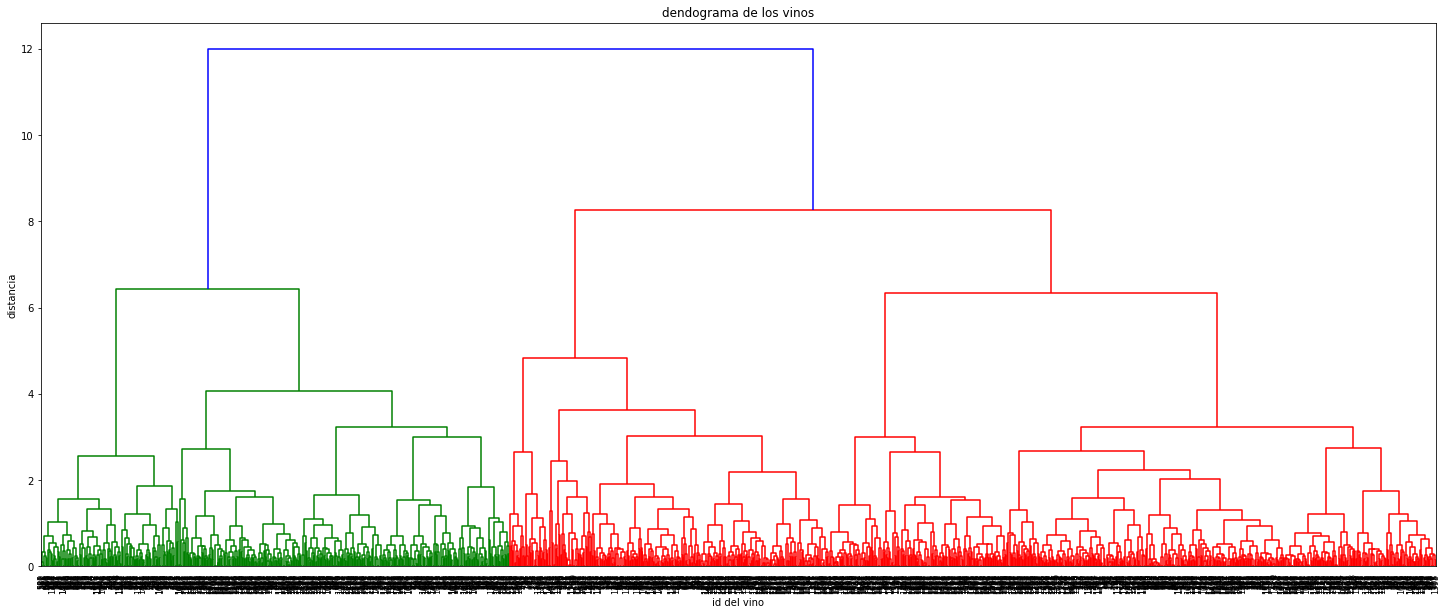

In [19]:
plt.figure(figsize=(25,10))
dendrogram(Z,leaf_rotation=90.0, leaf_font_size=8.0)
plt.title("dendograma de los vinos")
plt.xlabel("id del vino")
plt.ylabel("distancia")

In [23]:
# podemos marcar la distancia, para tener 6 cluster, entre 4 y 6
# si no queremos hacerlo asi, podemos hacer , como vimos antes con kmeans
from sklearn.cluster import KMeans
from sklearn import datasets


model = KMeans(n_clusters=6)
model.fit(df_norma)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [24]:
# podemos ver a que clase pertenecen cada vino
from sklearn.cluster import KMeans
model.labels_

array([4, 4, 4, ..., 3, 4, 1])

In [25]:
# ahora podemos incorporar al df los dos resultados , tanto el jeraquico como el de kmeans(no tienen porque coincidir los numeos pero si los clusteres)
nd_k = pd.Series(model.labels_)

df_norma["clus_h"] = nd
df_norma["clus_k"] = nd_k

df_norma.head(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clus_h,clus_k
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,2,4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,2,4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,3,5


In [26]:
# tambien podemos ver las cordenadas de los centroides
model.cluster_centers_

array([[0.31861649, 0.27742235, 0.30787546, 0.1620001 , 0.12835189,
        0.40625806, 0.31125176, 0.53978205, 0.43007124, 0.19155096,
        0.21942331, 0.45421245],
       [0.36946903, 0.15456719, 0.43349138, 0.10702055, 0.10525445,
        0.1657965 , 0.08396795, 0.40450782, 0.41277491, 0.24001136,
        0.50537135, 0.71465517],
       [0.33664439, 0.27759528, 0.28336735, 0.09151058, 0.13804754,
        0.13825812, 0.12776135, 0.52276564, 0.4103862 , 0.1870341 ,
        0.21036107, 0.48027211],
       [0.17551622, 0.31760528, 0.09634259, 0.09370244, 0.09543684,
        0.24771779, 0.12411661, 0.31965859, 0.57706328, 0.18743069,
        0.49824311, 0.61759259],
       [0.23937091, 0.38357095, 0.06986413, 0.09372208, 0.12084906,
        0.16348362, 0.10594945, 0.48221725, 0.52255221, 0.15368719,
        0.23527731, 0.4298913 ],
       [0.59570633, 0.2022292 , 0.55018519, 0.13330797, 0.16815835,
        0.14495305, 0.0964697 , 0.65947408, 0.3161636 , 0.25088711,
        0.29840931,

In [27]:
# y para ver el coeficiente para ver la eficicencia del modelo (dividio la distancia )
model.inertia_

188.5397847221595

### interpretacion final
* ahora podemos ver las caracteristicas de cada cluster para poder por ejemplo establecer un precio, o campaña de marketing (ojo¡¡ aqui no tenemos en cuenta la opinion del experto cuando decide la calidad del vino "quality")
* por ejemplo si queremos vender vinos a los paises del norte que lo prefieren con menor acided podemos fijarnos en los datos y seleccinar los que tengan menos valor(ej clulster 3 y 4)
* tambien podemos usar la opinion del experto para establecer una campaña

In [28]:
df_norma.groupby("clus_k").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clus_h
clus_k,,,,,,,,,,,,,
0,0.318616,0.277422,0.307875,0.162000,0.128352,0.406258,0.311252,0.539782,0.430071,0.191551,0.219423,0.454212,1.062271
1,0.369469,0.154567,0.433491,0.107021,0.105254,0.165797,0.083968,0.404508,0.412775,0.240011,0.505371,0.714655,0.081897
2,0.336644,0.277595,0.283367,0.091511,0.138048,0.138258,0.127761,0.522766,0.410386,0.187034,0.210361,0.480272,1.534014
3,0.175516,0.317605,0.096343,0.093702,0.095437,0.247718,0.124117,0.319659,0.577063,0.187431,0.498243,0.617593,3.412037
4,0.239371,0.383571,0.069864,0.093722,0.120849,0.163484,0.105949,0.482217,0.522552,0.153687,0.235277,0.429891,2.125000
5,0.595706,0.202229,0.550185,0.133308,0.168158,0.144953,0.096470,0.659474,0.316164,0.250887,0.298409,0.557407,2.486111
